# Author :- Purnesh Mistry

# TASK (1) : Prediction Using Supervised ML

To Predict The Percentage of Marks of The Students Based on The Number of Hours They Studied.

In [17]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [15]:
# Reading the data
df = pd.read_csv('http://bit.ly/w-data')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
#Check if there is any null value in the dataset
df.isnull == True

False

### There is no any null value in the dataset. Now, we can visualize our data.

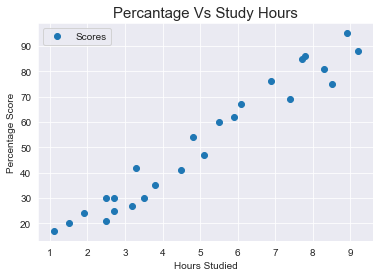

In [24]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.grid(linestyle='-')
plt.title('Percantage Vs Study Hours', size=15)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Percentage Score',size=10)
plt.show()

#### From the above scatterplot graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#### Lets plot a Regression plot to confirm the correlation. 

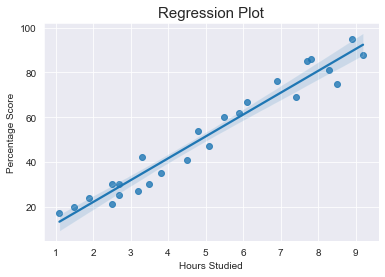

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [25]:
sns.regplot(x=df['Hours'], y=df['Scores'])
plt.title('Regression Plot', size=15)
plt.ylabel('Percentage Score', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(df.corr())

#### It is confirmed that the variables are positively correlated. 

## Training the model

### (1) Preparing  the data

 Divide the data into "attributes" as a input and "labels" as a outputs.

In [29]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

# Spliting the Data in two
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### (2) Fitting the data into a model 

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [31]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

print("Model Training Completed...")

Model Training Completed...


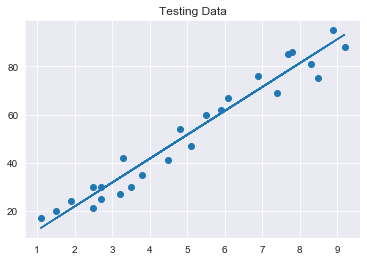

In [33]:
#plotting the regression line
line  = regression.coef_*X+regression.intercept_

#plotting for the test data
plt.scatter(X,Y)
plt.plot(X,line)
plt.title('Testing Data')
plt.show()

## Making Some Prediction 

### (1) Predicting the percentage score 

In [34]:
pred_y = regression.predict(X_test)
prediction_data = pd.DataFrame({'Hours':[i[0] for i in X_test], 'Predicted Marks': [p for p in pred_y]})
prediction_data

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### (2) Comparing Predicting the percentage score with actual score   

comp_scores = pd.DataFrame({'Actual Score':Y_test, 'Predicted Score':pred_y})
comp_scores

### (3) Lets visualize comparing  predicting the percentage score with actual score

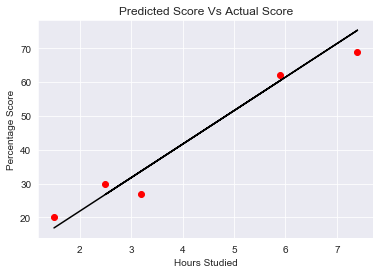

In [40]:
plt.scatter(x=X_test, y=Y_test, color='r')
plt.plot(X_test, pred_y, 'Black')
plt.title('Predicted Score Vs Actual Score')
plt.xlabel('Hours Studied', size=10)
plt.ylabel('Percentage Score', size=10)
plt.show()

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day? 

In [49]:
# You can also test with your own data
hours = [9.25]
Predicted_Score = regression.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(Predicted_Score[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737538


## Evaluating the model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [51]:

# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(Y_test,pred_y))

Mean absolute error:  4.183859899002975


#### Small value of mean absolute error state says that the chances of error or wrong forecasting through the model are very less. 

## Thank You :)